In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:



nx=9
ny=6

#def calibrate(nx,ny):
undist=[]
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
image_store=[]
image=[]
undst=[]
#global ret, mtx ,dist ,rvecs ,tvecs
images = glob.glob('camera_cal/calibration*.jpg')
k=0
l=0
for fname in images:
    k+=1
    img = cv2.imread(fname)
    image.append(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    image_store.append(img)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)      
        l+=1
ret, mtx ,dist ,rvecs ,tvecs = cv2.calibrateCamera(objpoints,imgpoints,(gray.shape[0],gray.shape[1]),None,None)
#    return ret, mtx, dist, rvecs, tvecs


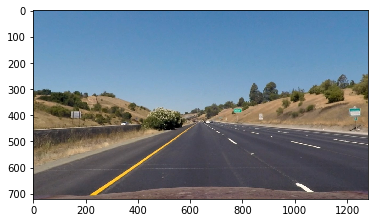

In [18]:
plt.imshow(image)
#cal=calibrate(nx,ny)
dstt=undistort(image,mtx,dist)

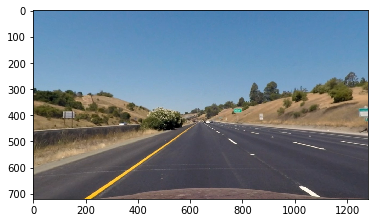

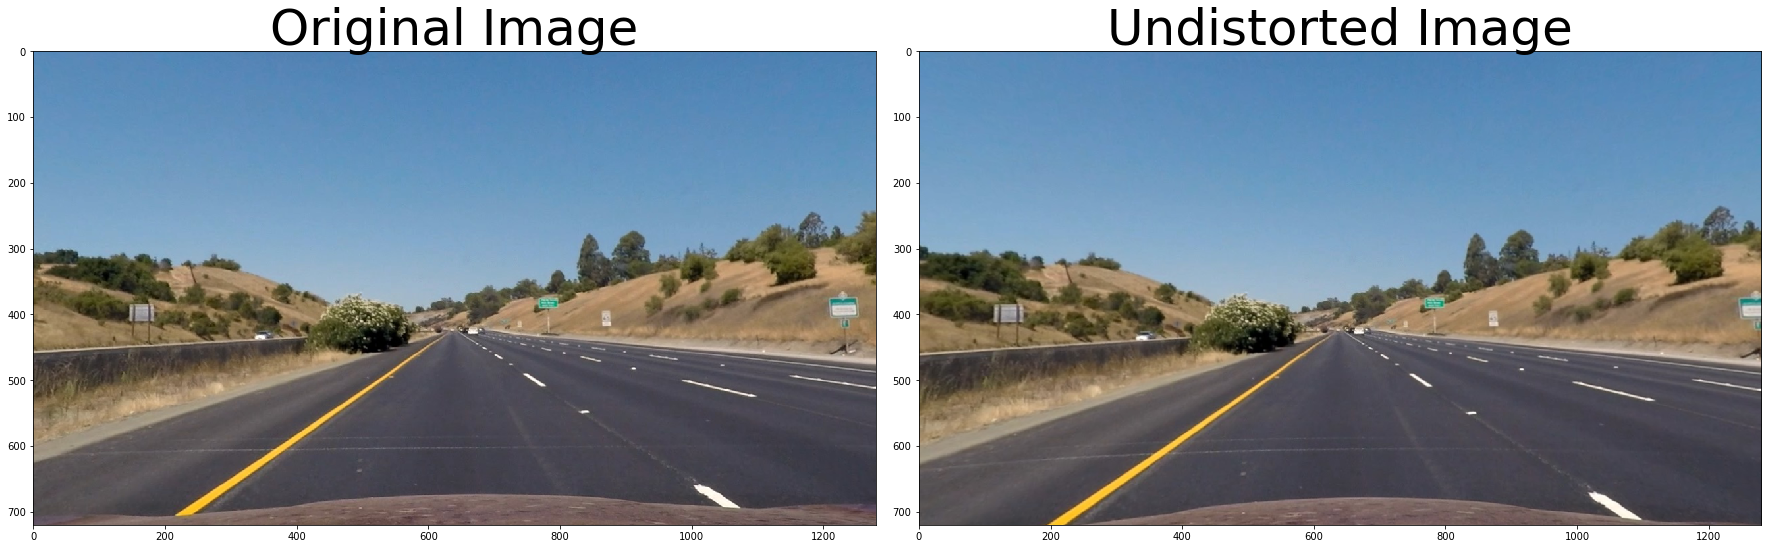

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dstt)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Sobel Treshold

In [10]:
image=cv2.imread('test_images/straight_lines1.jpg')
#image=cv2.imread('test_images/straight_lines2.jpg')
#image=cv2.imread('test_images/test1.jpg') #fail sliding window
#image=cv2.imread('test_images/test2.jpg')#fail
#image=cv2.imread('test_images/test3.jpg')
#image=cv2.imread('test_images/test4.jpg')
#image=cv2.imread('test_images/test5.jpg')
#image=cv2.imread('test_images/test6.jpg')
#image=cv2.imread('signs_vehicles_xygrad.jpg')
#image=cv2.imread('solidWhiteRight.jpg')
#image=cv2.imread('solidYellowCurve.jpg')
#image=cv2.imread('test4.jpg')#fail
#image=cv2.imread('color-shadow-example.jpg')#fail

image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

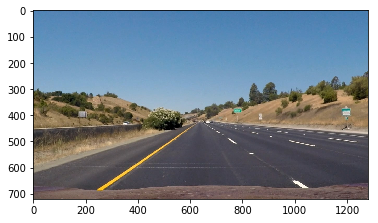

In [11]:
plt.imshow(image)

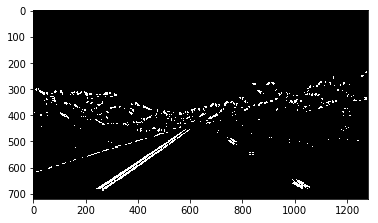

In [12]:


def undistort(image,mtx,dist):        
    undist=cv2.undistort(image,mtx,dist,None,mtx)
    return undist
def abs_sobel_thresh(image, orient='x', sobel_kernel=5, thresh=(0, 255)):
    # Calculate directional gradient
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output
    


def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx=(cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel))
    sobely=(cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel))
    # 3) Calculate the magnitude 
    sob_power=np.sqrt(sobelx**2+sobely**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    sob_scale=np.uint8(255*sob_power/np.max(sob_power))
    # 5) Create a binary mask where mag thresholds are met
    binary_output=np.zeros_like(sob_scale)
    # 6) Return this mask as your binary_output image
    binary_output[(sob_scale>mag_thresh[0])&(sob_scale<mag_thresh[1])]=1# Remove this line
    return binary_output
    
    
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    absx=np.absolute(sobelx)
    absy=np.absolute(sobely)
    
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    magnitude=np.absolute(np.arctan2(absy,absx))
    
   
    
    #magnitude = cv2.fastNlMeansDenoising(magnitude,7,21,1)
    #magnitude=cv2.GaussianBlur(magnitude,(5,5),1)
    
    
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output=np.zeros_like(magnitude)
    # 6) Return this mask as your binary_output image
    binary_output[(magnitude>thresh[0])&(magnitude<thresh[1])]=1# Remove this line
    
    return binary_output
    # Calculate gradient direction
    # Apply threshold
    

# Choose a Sobel kernel size
def sob(image,ksize):
    image=cv2.GaussianBlur(image,(ksize,ksize),11)

    ksize = 11 # Choose a larger odd number to smooth gradient measurements
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=5, thresh=(50,80))#30, 120
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=5, thresh=(80, 120))
    mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(120,250))#120, 250
    dir_binary = dir_threshold(image, sobel_kernel=9, thresh=(0.7, 1.3))

    gradxn = ~gradx
    gradyn = ~grady
    mag_binaryn = ~mag_binary
    dir_binaryn =  ~np.uint8(255*dir_binary/np.max(dir_binary))
    
    return gradx,grady,mag_binary,dir_binary,gradxn,gradyn,mag_binaryn,dir_binaryn

binary=sob(image,11)
#plt.imshow(binary[3])

combsob = np.zeros_like(binary[3])
#combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
combsob[((binary[3] == 1) &(binary[0] == 1) ) | ((binary[2] == 1)& (binary[3] == 1)) | ((binary[1] == 1)&(binary[3] == 1))] = 1

f, (a,b )= plt.subplots(1, 2, figsize=(24, 15))
#~HH&LL
a.imshow((~HH|SS)&VV,cmap='gray')
a.set_title('Bitwise AND Hue and Lightning')
b.imshow(~HH&VV,cmap='gray')
b.set_title('Bitwise AND Hue and Value')
plt.imshow(combsob,cmap='gray')

In [13]:
image=undistort(image,mtx,dist)
imagek=image

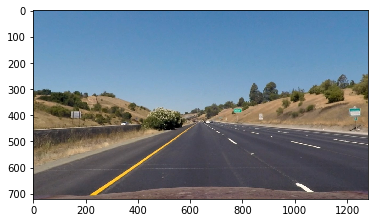

In [14]:
plt.imshow(image)

## Color Treshold

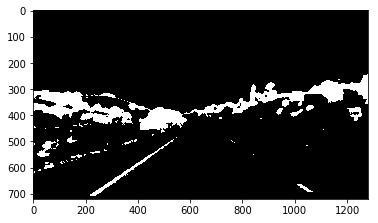

In [15]:
def color_threshold(image,ksize,std):
    image=cv2.GaussianBlur(image,(ksize,ksize),std)    
    RGB=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    RR=RGB[:,:,0]
    
    
    
    threshgray = (180, 255)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binarygray = np.zeros_like(gray)
    binarygray[(gray > threshgray[0]) & (gray <= threshgray[1])] = 1

    
    HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    HH=HSV[:,:,0]
    SS=HSV[:,:,1]
    VV=HSV[:,:,2]
    
    HLS = cv2.cvtColor(image,cv2.COLOR_BGR2HLS)
    LL=HLS[:,:,1]
    SS=HLS[:,:,2]
    
    
    threshS = (90, 255)
    binaryS = np.zeros_like(SS)
    binaryS[(SS > threshS[0]) & (SS <= threshS[1])] = 1



    threshH = (15,100)
    binaryH = np.zeros_like(HH)
    binaryH[(HH > threshH[0]) & (HH <= threshH[1])] = 1

    threshR = (200, 255)
    binaryR = np.zeros_like(RR)
    binaryR[(RR > threshR[0]) & (RR <= threshR[1])] = 1
    
    threshV = (200, 255)
    
#######################################################################    
    sV_thresh=(218,255)
    sobelV = cv2.Sobel(VV, cv2.CV_64F,1,0) # Take the derivative in x
    abs_sobelV = np.absolute(sobelV) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelV = np.uint8(255*abs_sobelV/np.max(abs_sobelV))
    binaryV = np.zeros_like(VV)
    binaryV[(VV > sV_thresh[0]) & (VV <= sV_thresh[1])] = 1
    
    #90,255
    threshS = (190, 235)
    sobelS = cv2.Sobel(SS, cv2.CV_64F,1,0) # Take the derivative in x
    abs_sobelS = np.absolute(sobelS) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelS = np.uint8(255*abs_sobelS/np.max(abs_sobelS))
    binaryS = np.zeros_like(SS)
    binaryS[(SS > threshS[0]) & (SS <= threshS[1])] = 1
    
    threshH = (30,100)
    sobelH = cv2.Sobel(HH, cv2.CV_64F,1,0) # Take the derivative in x
    abs_sobelH = np.absolute(sobelH) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelH = np.uint8(255*abs_sobelH/np.max(abs_sobelH))
    binaryH = np.zeros_like(HH)
    binaryH[(HH > threshH[0]) & (HH <= threshH[1])] = 1
    
    
    #comb=binaryS#|binaryV
    #comb=binaryV#|binaryS
    comb=binaryH|binaryV|binaryS
    return comb


combcol=color_threshold(image,5,5)
plt.imshow(combcol,cmap='gray')

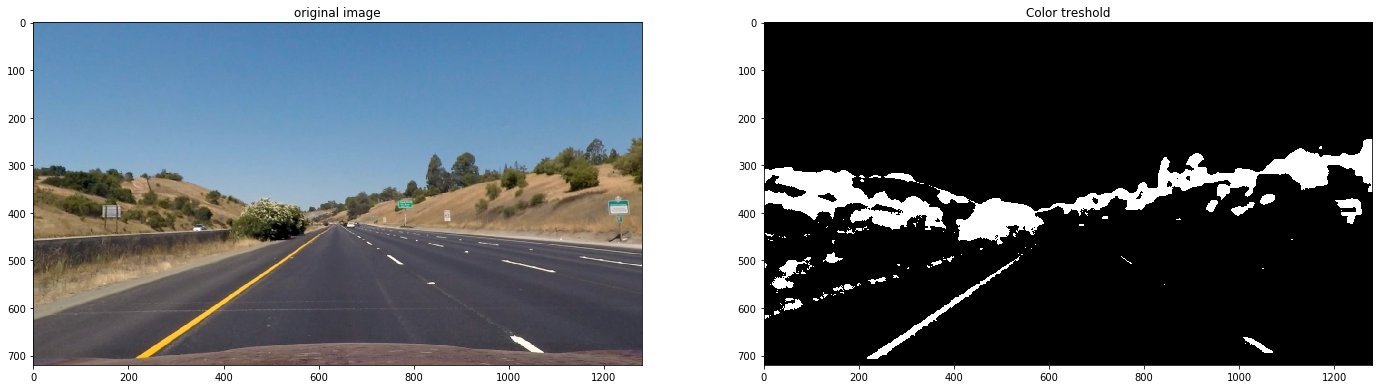

In [22]:
f, (a,b )= plt.subplots(1, 2, figsize=(24, 15))
#~HH&LL
a.imshow((image),cmap='gray')
a.set_title('original image')
b.imshow(combcol,cmap='gray')
b.set_title('Color treshold')

True

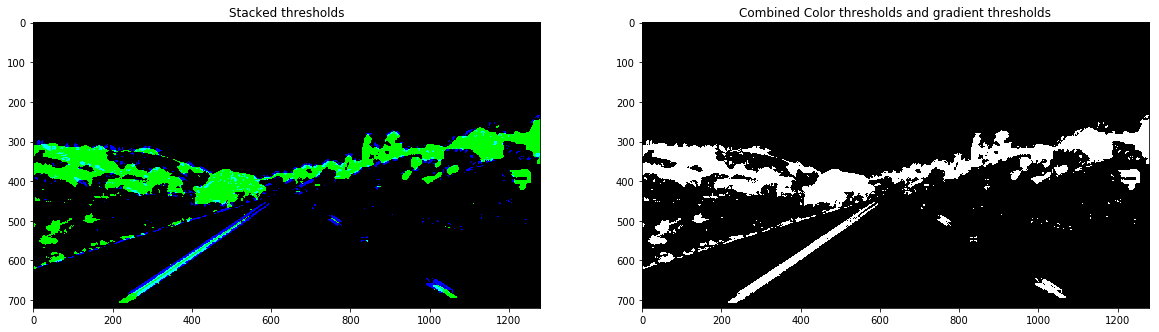

In [24]:
color_binary = np.dstack(( np.zeros_like(combcol), combcol, combsob))

# Combine the two binary thresholds
combined_binary = np.zeros_like(combcol)
combined_binary[(combcol == 1) |(combsob == 1)] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined Color thresholds and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')
cv2.imwrite("combined_binary.png",combcol)

In [11]:
#def birdseye(image,pts):
    

1280


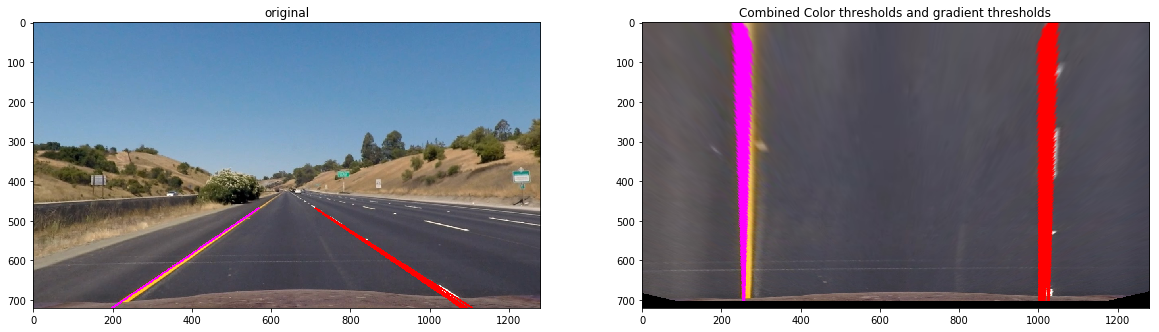

In [36]:
#imagek=cv2.imread('test_images/straight_lines1.jpg')
image=combined_binary
#imagek=undistort(imagek,mtx,dist)
print(image.shape[1])
x0,x1=image.shape[1]*0.155,image.shape[1]*.445
x2,x3=image.shape[1]*.555,image.shape[1]*.865
y0,y1=image.shape[0],image.shape[0]*.65
y2,y3=image.shape[0]*.65,image.shape[0]
#cv2.rectangle(dst, (int(x0),int(y1)), (int(x2),int(y2)), (255,0,0),2) 
imk=image
cv2.line(imagek,(int(x0),int(y0)),(int(x1),int(y1)),(255,0,255),3)
cv2.line(imagek,(int(x3),int(y3)),(int(x2),int(y2)),(255,0,0),3)

#plt.imshow(image,cmap='gray')
pts = np.array([[x0,y0],[x1,y1],[x2,y2],[x3,y3]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(image,[pts],True,(0,255,255),3)
cv2.addWeighted(image, 1, imk, 0.3, 0)    

pts1 = np.float32([[x1,y1],[x2,y2],[x0,y0],[x3,y3]])
xx=image.shape[1]
yy=image.shape[0]
pts2 = np.float32([[image.shape[1]/5, image.shape[0]/40],[image.shape[1]/1.25, image.shape[0]/40],
[image.shape[1]/5, image.shape[0]/1.025],[image.shape[1]/1.25, image.shape[0]/1.025]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(imagek,M,(image.shape[1],image.shape[0]))

#plt.scatter(x=(x0,x1,x2,x3), y=(y0,y1,y2,y3), c='r', s=40)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('original')
ax1.imshow(imagek)

ax2.set_title('Combined Color thresholds and gradient thresholds')
ax2.imshow(dst, cmap='gray')
#cv2.imwrite("combined_binary.png",combcol)

In [13]:
img=cv2.imread('test_images/straight_lines1.jpg')
imk=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)[:,:,2]

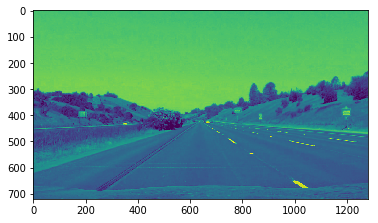

In [14]:
plt.imshow(imk)

In [18]:
print(image.shape[0]/1.025)

702.439024390244


In [19]:
print(image.shape)

(720, 1280)


In [20]:
print(x0,x1,x2,x3)
print(y0,y1,y2,y3)

198.4 576.0 710.4000000000001 1120.0
720 468.0 468.0 720


720 1280
1280


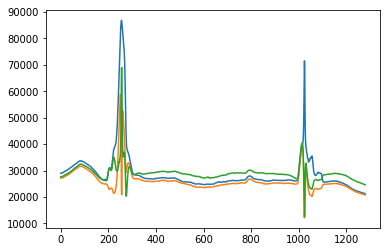

In [21]:
print(dst.shape[0],dst.shape[1])
k=image.shape[1]
print(k)
histogram = np.sum(dst[int(image.shape[0]/2):,:], axis=0)
plt.plot(histogram)

In [22]:
print(image.shape[0]/8*3)

270.0


## Sliding Window

In [37]:
histogram = np.sum(dst[int(dst.shape[0]/2):,:], axis=0)

# Create an output image to draw on and  visualize the result
out_img = np.dstack((dst, dst, dst))*255

# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines

midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows

nwindows = 15
# Set height of windows
window_height = np.int(dst.shape[0]/nwindows)

# Identify the x and y positions of all nonzero pixels in the image

nonzero = dst.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Current positions to be updated for each window

leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100

# Set minimum number of pixels found to recenter window
minpix = 80

# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    
    # Identify window boundaries in x and y (and right and left)
    win_y_low = dst.shape[0] - (window+1)*window_height
    win_y_high = dst.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

error: ..\..\..\modules\core\src\matrix.cpp:1052: error: (-215) cn <= 4 in function cv::scalarToRawData


In [24]:
ym_per_pix = 30./720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meteres per pixel in x dimension

left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
left_curverad = ((1 + (2*left_fit_cr[0]*np.max(lefty) + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*np.max(lefty) + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])
print(left_curverad)
print(right_curverad)

NameError: name 'lefty' is not defined

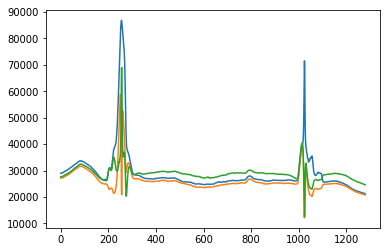

In [25]:
plt.plot(histogram)

In [26]:
ploty = np.linspace(0, dst.shape[0]-1, dst.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

#out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
#out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

NameError: name 'left_fit' is not defined

In [27]:
nonzero = dst.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, dst.shape[0]-1, dst.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

NameError: name 'left_fit' is not defined

In [28]:
out_img = np.dstack((dst, dst, dst))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (0,9)

In [29]:
def curvature(image,left_fit,right_fit):
    y_eval = np.max(image.shape[0])
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    print(left_curverad, right_curverad)

In [30]:
curvature(image,left_fit,right_fit)

NameError: name 'left_fit' is not defined